# Problem 2: Sectoral Segmentation

#### Step 1: Import necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display the dataframe summary completely
pd.set_option('display.float_format', '{:.2f}'.format)

#### Step 2: Load data from csv file and analyze the summary

In [ ]:
url = "https://raw.githubusercontent.com/aniruddharapatwar/MLUL/refs/heads/main/FinancialComapnies.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,S.No.,Name,CMP Rs.,Cur Assets Rs.Cr.,Cur Liab Rs.Cr.,Debt / Eq,Inven TO,ROE %,OPM %,P/E,B.V. Rs.,No. Eq. Shares Cr.,Asset Turnover,WC to Sales %,Dividend Payout %,Mar Cap Rs.Cr.
0,1,HDFC Bank,1651.00,436715.50,174832.07,6.81,NaN,17.14,33.60,18.48,600.76,763.08,0.09,83.40,23.12,1259841.50
1,2,ICICI Bank,1223.00,254098.30,161704.49,6.45,NaN,18.80,34.44,19.02,364.76,704.66,0.07,55.33,15.87,861801.94
2,3,St Bk of India,799.75,780703.07,304771.04,13.51,NaN,17.34,47.05,9.79,464.94,892.46,0.07,104.38,18.23,713745.84
3,4,Kotak Mah. Bank,1882.40,86727.38,43945.30,4.00,NaN,15.06,15.88,20.08,653.81,198.81,0.08,72.26,2.18,374252.02
4,5,Axis Bank,1172.45,174989.54,65413.62,8.25,NaN,18.40,62.96,13.57,508.73,309.34,0.08,93.12,1.17,362679.84


In [ ]:
df.describe()

,SNo,CMPRs,Cur AssetsRsCr,Cur LiabRsCr,Debt / Eq,Inven TO,ROE%,OPM%,P/E,BVRs,No Eq SharesCr,Asset Turnover,WC to Sales%,Dividend Payout%,Mar CapRsCr,Cluster
count,41.00,41.00,41.00,41.00,41.00,0.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,21.00,347.78,76900.03,29445.96,9.10,NaN,14.09,36.09,15.34,197.34,461.72,0.09,103.78,10.82,121149.95,0.20
std,11.98,466.08,142604.97,59021.29,2.94,NaN,5.23,127.15,12.34,198.83,614.44,0.03,74.47,8.42,255712.82,0.46
min,1.00,21.40,1423.65,147.87,3.30,NaN,3.18,-754.45,5.37,14.32,4.51,0.05,28.27,0.00,900.72,0.00
25%,11.00,56.96,4898.20,2043.64,6.81,NaN,10.82,47.05,6.97,45.65,60.77,0.07,57.83,2.18,7156.69,0.00
50%,21.00,153.90,23764.08,5958.13,8.32,NaN,14.42,58.49,10.27,124.83,193.42,0.08,95.14,10.94,41718.99,0.00
75%,31.00,412.30,77136.73,24335.36,11.64,NaN,17.14,65.95,18.48,265.84,763.08,0.09,123.76,18.23,89546.01,0.00
max,41.00,1882.40,780703.07,304771.04,14.87,NaN,26.66,70.60,56.63,806.83,3134.69,0.16,484.63,27.87,1259841.50,2.00


### Step 3: Select the relevant columns for clustering (dropping the non-numerical 'Name' and 'S.No.' columns and NaN column 'Inven TO')

- Format colum names and remove junk charectars
- Drop Non Numeric Column - Name
- Drop Null column Inven TO
- Drop Serial Number

In [ ]:
print(df.columns.tolist())

['S.No.', 'Name', 'CMP\xa0Rs.', 'Cur Assets\xa0Rs.Cr.', 'Cur Liab\xa0Rs.Cr.', 'Debt / Eq', 'Inven TO', 'ROE\xa0%', 'OPM\xa0%', 'P/E', 'B.V.\xa0Rs.', 'No. Eq. Shares\xa0Cr.', 'Asset Turnover', 'WC to Sales\xa0%', 'Dividend Payout\xa0%', 'Mar Cap\xa0Rs.Cr.\xa0']


In [ ]:
df.columns = df.columns.str.replace('\xa0', '', regex=False)  # Remove periods from column names
df.columns = df.columns.str.replace('.', '', regex=False)  # Remove periods from column names
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

In [ ]:
print(df.columns.tolist())

['SNo', 'Name', 'CMPRs', 'Cur AssetsRsCr', 'Cur LiabRsCr', 'Debt / Eq', 'Inven TO', 'ROE%', 'OPM%', 'P/E', 'BVRs', 'No Eq SharesCr', 'Asset Turnover', 'WC to Sales%', 'Dividend Payout%', 'Mar CapRsCr']


In [ ]:
##### Create a dataframe with numeric columns by dropping text and NaN columns

In [ ]:
data = df[[ 'CMPRs', 'Cur AssetsRsCr', 'Cur LiabRsCr', 'Debt / Eq', 'ROE%', 'OPM%', 'P/E', 'BVRs', 'No Eq SharesCr', 'Asset Turnover', 'WC to Sales%', 'Dividend Payout%', 'Mar CapRsCr']]

In [ ]:
data.head()

,CMPRs,Cur AssetsRsCr,Cur LiabRsCr,Debt / Eq,ROE%,OPM%,P/E,BVRs,No Eq SharesCr,Asset Turnover,WC to Sales%,Dividend Payout%,Mar CapRsCr
0,1651.00,436715.50,174832.07,6.81,17.14,33.60,18.48,600.76,763.08,0.09,83.40,23.12,1259841.50
1,1223.00,254098.30,161704.49,6.45,18.80,34.44,19.02,364.76,704.66,0.07,55.33,15.87,861801.94
2,799.75,780703.07,304771.04,13.51,17.34,47.05,9.79,464.94,892.46,0.07,104.38,18.23,713745.84
3,1882.40,86727.38,43945.30,4.00,15.06,15.88,20.08,653.81,198.81,0.08,72.26,2.18,374252.02
4,1172.45,174989.54,65413.62,8.25,18.40,62.96,13.57,508.73,309.34,0.08,93.12,1.17,362679.84


### Step 4: Handle missing values (optional, depends on your data)

In [ ]:
# Here we just drop rows with missing values
data = data.dropna()

In [ ]:
data.head()

,CMPRs,Cur AssetsRsCr,Cur LiabRsCr,Debt / Eq,ROE%,OPM%,P/E,BVRs,No Eq SharesCr,Asset Turnover,WC to Sales%,Dividend Payout%,Mar CapRsCr
0,1651.00,436715.50,174832.07,6.81,17.14,33.60,18.48,600.76,763.08,0.09,83.40,23.12,1259841.50
1,1223.00,254098.30,161704.49,6.45,18.80,34.44,19.02,364.76,704.66,0.07,55.33,15.87,861801.94
2,799.75,780703.07,304771.04,13.51,17.34,47.05,9.79,464.94,892.46,0.07,104.38,18.23,713745.84
3,1882.40,86727.38,43945.30,4.00,15.06,15.88,20.08,653.81,198.81,0.08,72.26,2.18,374252.02
4,1172.45,174989.54,65413.62,8.25,18.40,62.96,13.57,508.73,309.34,0.08,93.12,1.17,362679.84


### Step 5: Standardize the data (important for distance-based methods)

In [ ]:
# Standerdize using StandardScalar
scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data)

In [ ]:
# Look the first row
data_scaled_standard[0]

array([ 2.83088248,  2.55450699,  2.49388332, -0.78690048,  0.59057345,
       -0.01983638,  0.25789317,  2.05418226,  0.4965597 ,  0.01828181,
       -0.27710483,  1.47921198,  4.50832821])

In [ ]:
# # Standerdize using MinMaxScalar
scaler = MinMaxScaler()
data_scaled_minmax = scaler.fit_transform(data)

In [ ]:
# Look the first row
data_scaled_minmax[0]

array([0.87565825, 0.5585825 , 0.57344358, 0.30337079, 0.59454855,
       0.95515423, 0.25575497, 0.73997804, 0.2423407 , 0.36363636,
       0.12080375, 0.82956584, 1.        ])

### Step 6: Compute the linkage matrix for hierarchical clustering

In [ ]:
linkage_matrix = linkage(data_scaled_minmax, method='ward')

In [ ]:
linkage_matrix

array([[19.        , 23.        ,  0.23827013,  2.        ],
       [ 9.        , 11.        ,  0.2426395 ,  2.        ],
       [22.        , 24.        ,  0.26346473,  2.        ],
       [34.        , 37.        ,  0.28050673,  2.        ],
       [25.        , 41.        ,  0.2911055 ,  3.        ],
       [26.        , 31.        ,  0.29385431,  2.        ],
       [ 6.        , 18.        ,  0.3025163 ,  2.        ],
       [33.        , 39.        ,  0.31604347,  2.        ],
       [ 5.        , 42.        ,  0.33422867,  3.        ],
       [35.        , 46.        ,  0.41222656,  3.        ],
       [29.        , 44.        ,  0.41424168,  3.        ],
       [27.        , 45.        ,  0.4547415 ,  4.        ],
       [43.        , 48.        ,  0.51023974,  4.        ],
       [50.        , 52.        ,  0.51215088,  7.        ],
       [14.        , 38.        ,  0.5127496 ,  2.        ],
       [12.        , 30.        ,  0.5221611 ,  2.        ],
       [28.        , 51.

### Step 7: Plot the dendrogram and elbo plot to visualize the clustering process

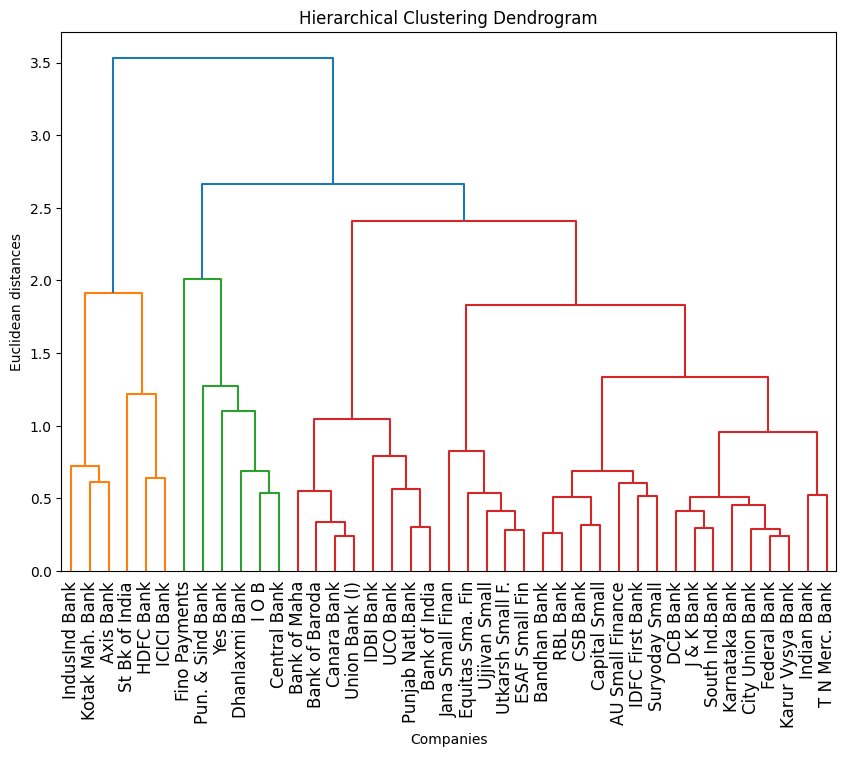

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df['Name'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Companies')
plt.ylabel('Euclidean distances')
plt.show()

#### Plot the Elbo graph to calculate Number of cluster

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

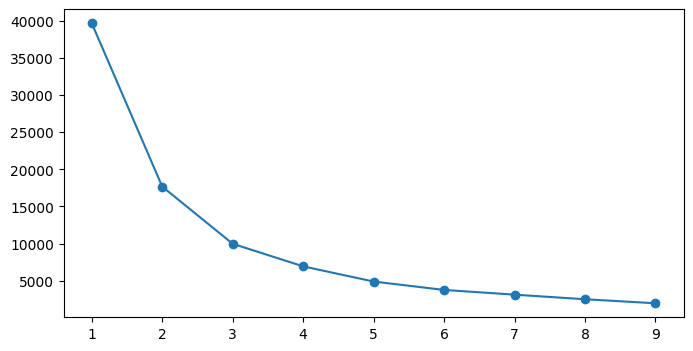

In [ ]:
# Select cluster range from 1 to 10
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( linkage_matrix )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

#### Step 8: Evaluate quality of cluster by using silhoutte score

In [ ]:
!pip install yellowbrick

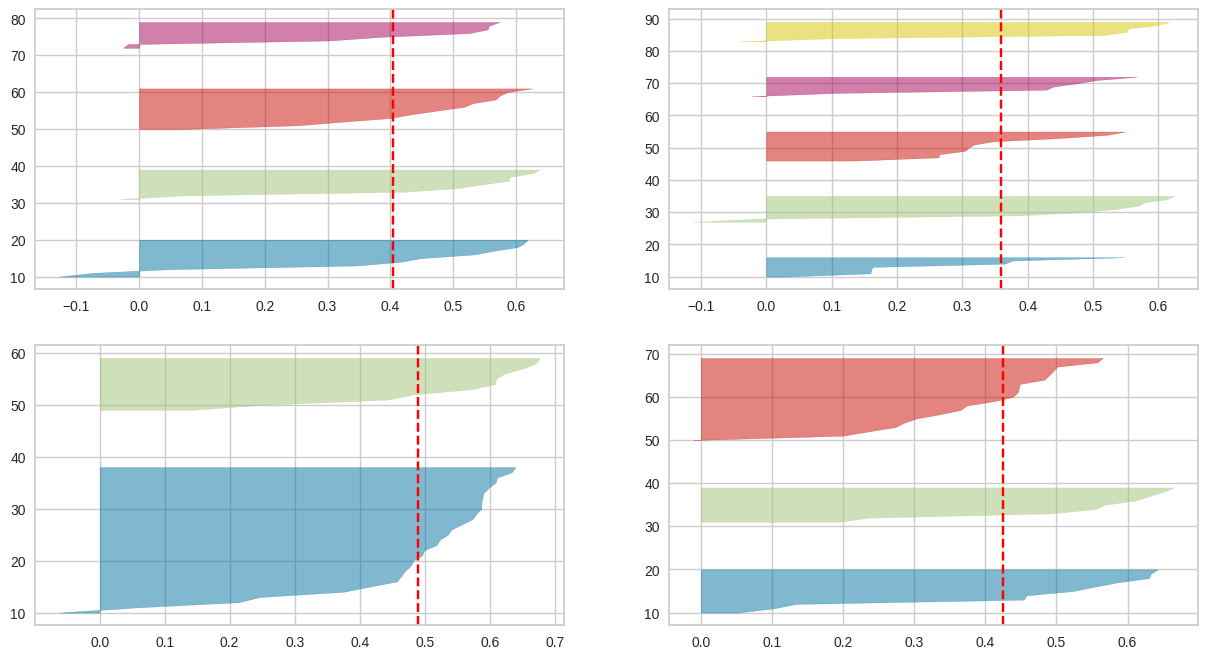

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [2, 3, 4, 5]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(linkage_matrix)

*   For K = 3, the sillhaute score is greater tahn 0.4 and non negative
*   Form ELBO plot and Sillhaoue Score we will go for cluster 3

#### Step 9: Evaluate Cluster Performance

calinski_harabasz_score

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
cluster_range = range( 3, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( data_scaled_standard )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(data_scaled_standard, clusters.labels_)}" )

n_cluster: 3 - CH Score: 10.768771719989987
n_cluster: 4 - CH Score: 9.770447782726864
n_cluster: 5 - CH Score: 13.955056402476938


davies_bouldin_score

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
cluster_range = range( 3, 6 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( data_scaled_standard )
  print(f"n_cluster: {num_clusters} - CH Score: {davies_bouldin_score(data_scaled_standard, clusters.labels_)}" )

n_cluster: 3 - CH Score: 1.6253080014353476
n_cluster: 4 - CH Score: 1.1547820734927512
n_cluster: 5 - CH Score: 1.1097048204346514


Cluster Metrics:
*   labels
*   Leaves
*   Children
*   Distances

In [ ]:
cluster.labels_

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0])

In [ ]:
cluster.n_leaves_

41

In [ ]:
cluster.children_

array([[19, 25],
       [ 9, 11],
       [22, 24],
       [34, 37],
       [26, 31],
       [33, 39],
       [23, 41],
       [ 6, 18],
       [ 5, 42],
       [28, 44],
       [35, 47],
       [27, 45],
       [43, 46],
       [12, 30],
       [29, 32],
       [14, 16],
       [51, 52],
       [38, 50],
       [ 8, 17],
       [15, 48],
       [ 3,  4],
       [20, 49],
       [ 7, 61],
       [ 0,  1],
       [10, 60],
       [53, 57],
       [40, 59],
       [55, 58],
       [54, 66],
       [56, 69],
       [62, 65],
       [21, 67],
       [13, 72],
       [ 2, 64],
       [70, 71],
       [63, 74],
       [68, 75],
       [73, 77],
       [36, 78],
       [76, 79]])

### Step 10: Apply Agglomerative Clustering (assuming 3 clusters, you can adjust based on the dendrogram)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(data_scaled_standard)

#### Trying different linkage methods - **Do not execute**

In [ ]:
# Trying Complete Linkage
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
df['Cluster'] = cluster.fit_predict(data_scaled_standard)

In [ ]:
# Trying average Linkage
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
df['Cluster'] = cluster.fit_predict(data_scaled_standard)

In [ ]:
# Trying single Linkage
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
df['Cluster'] = cluster.fit_predict(data_scaled_standard)

### Step 11: Check the results (which companies are in which cluster)

In [ ]:
cluster_info = df[['Name', 'Cluster']]

In [ ]:
print(df[['Name', 'Cluster']])

                Name  Cluster
0          HDFC Bank        1
1         ICICI Bank        1
2     St Bk of India        1
3    Kotak Mah. Bank        1
4          Axis Bank        1
5     Bank of Baroda        0
6   Punjab Natl.Bank        0
7      IndusInd Bank        1
8              I O B        0
9        Canara Bank        0
10         IDBI Bank        0
11    Union Bank (I)        0
12       Indian Bank        0
13          Yes Bank        0
14   IDFC First Bank        0
15          UCO Bank        0
16  AU Small Finance        0
17      Central Bank        0
18     Bank of India        0
19      Federal Bank        0
20      Bank of Maha        0
21  Pun. & Sind Bank        0
22      Bandhan Bank        0
23  Karur Vysya Bank        0
24          RBL Bank        0
25   City Union Bank        0
26        J & K Bank        0
27    Karnataka Bank        0
28  Equitas Sma. Fin        0
29     Ujjivan Small        0
30    T N Merc. Bank        0
31    South Ind.Bank        0
32  Jana S

In [ ]:
# Step 1: Count the number of companies in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

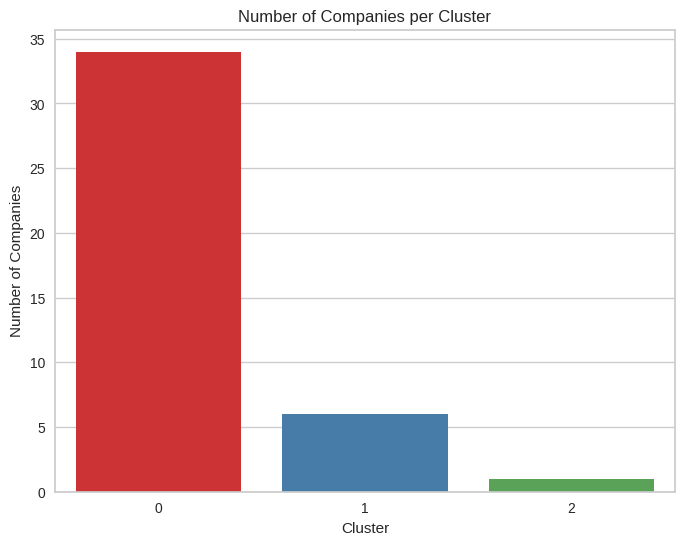

In [ ]:
# Step 2: Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='Set1')
plt.title('Number of Companies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.show()

### Step 10: Visualize the clusters in a pairplot

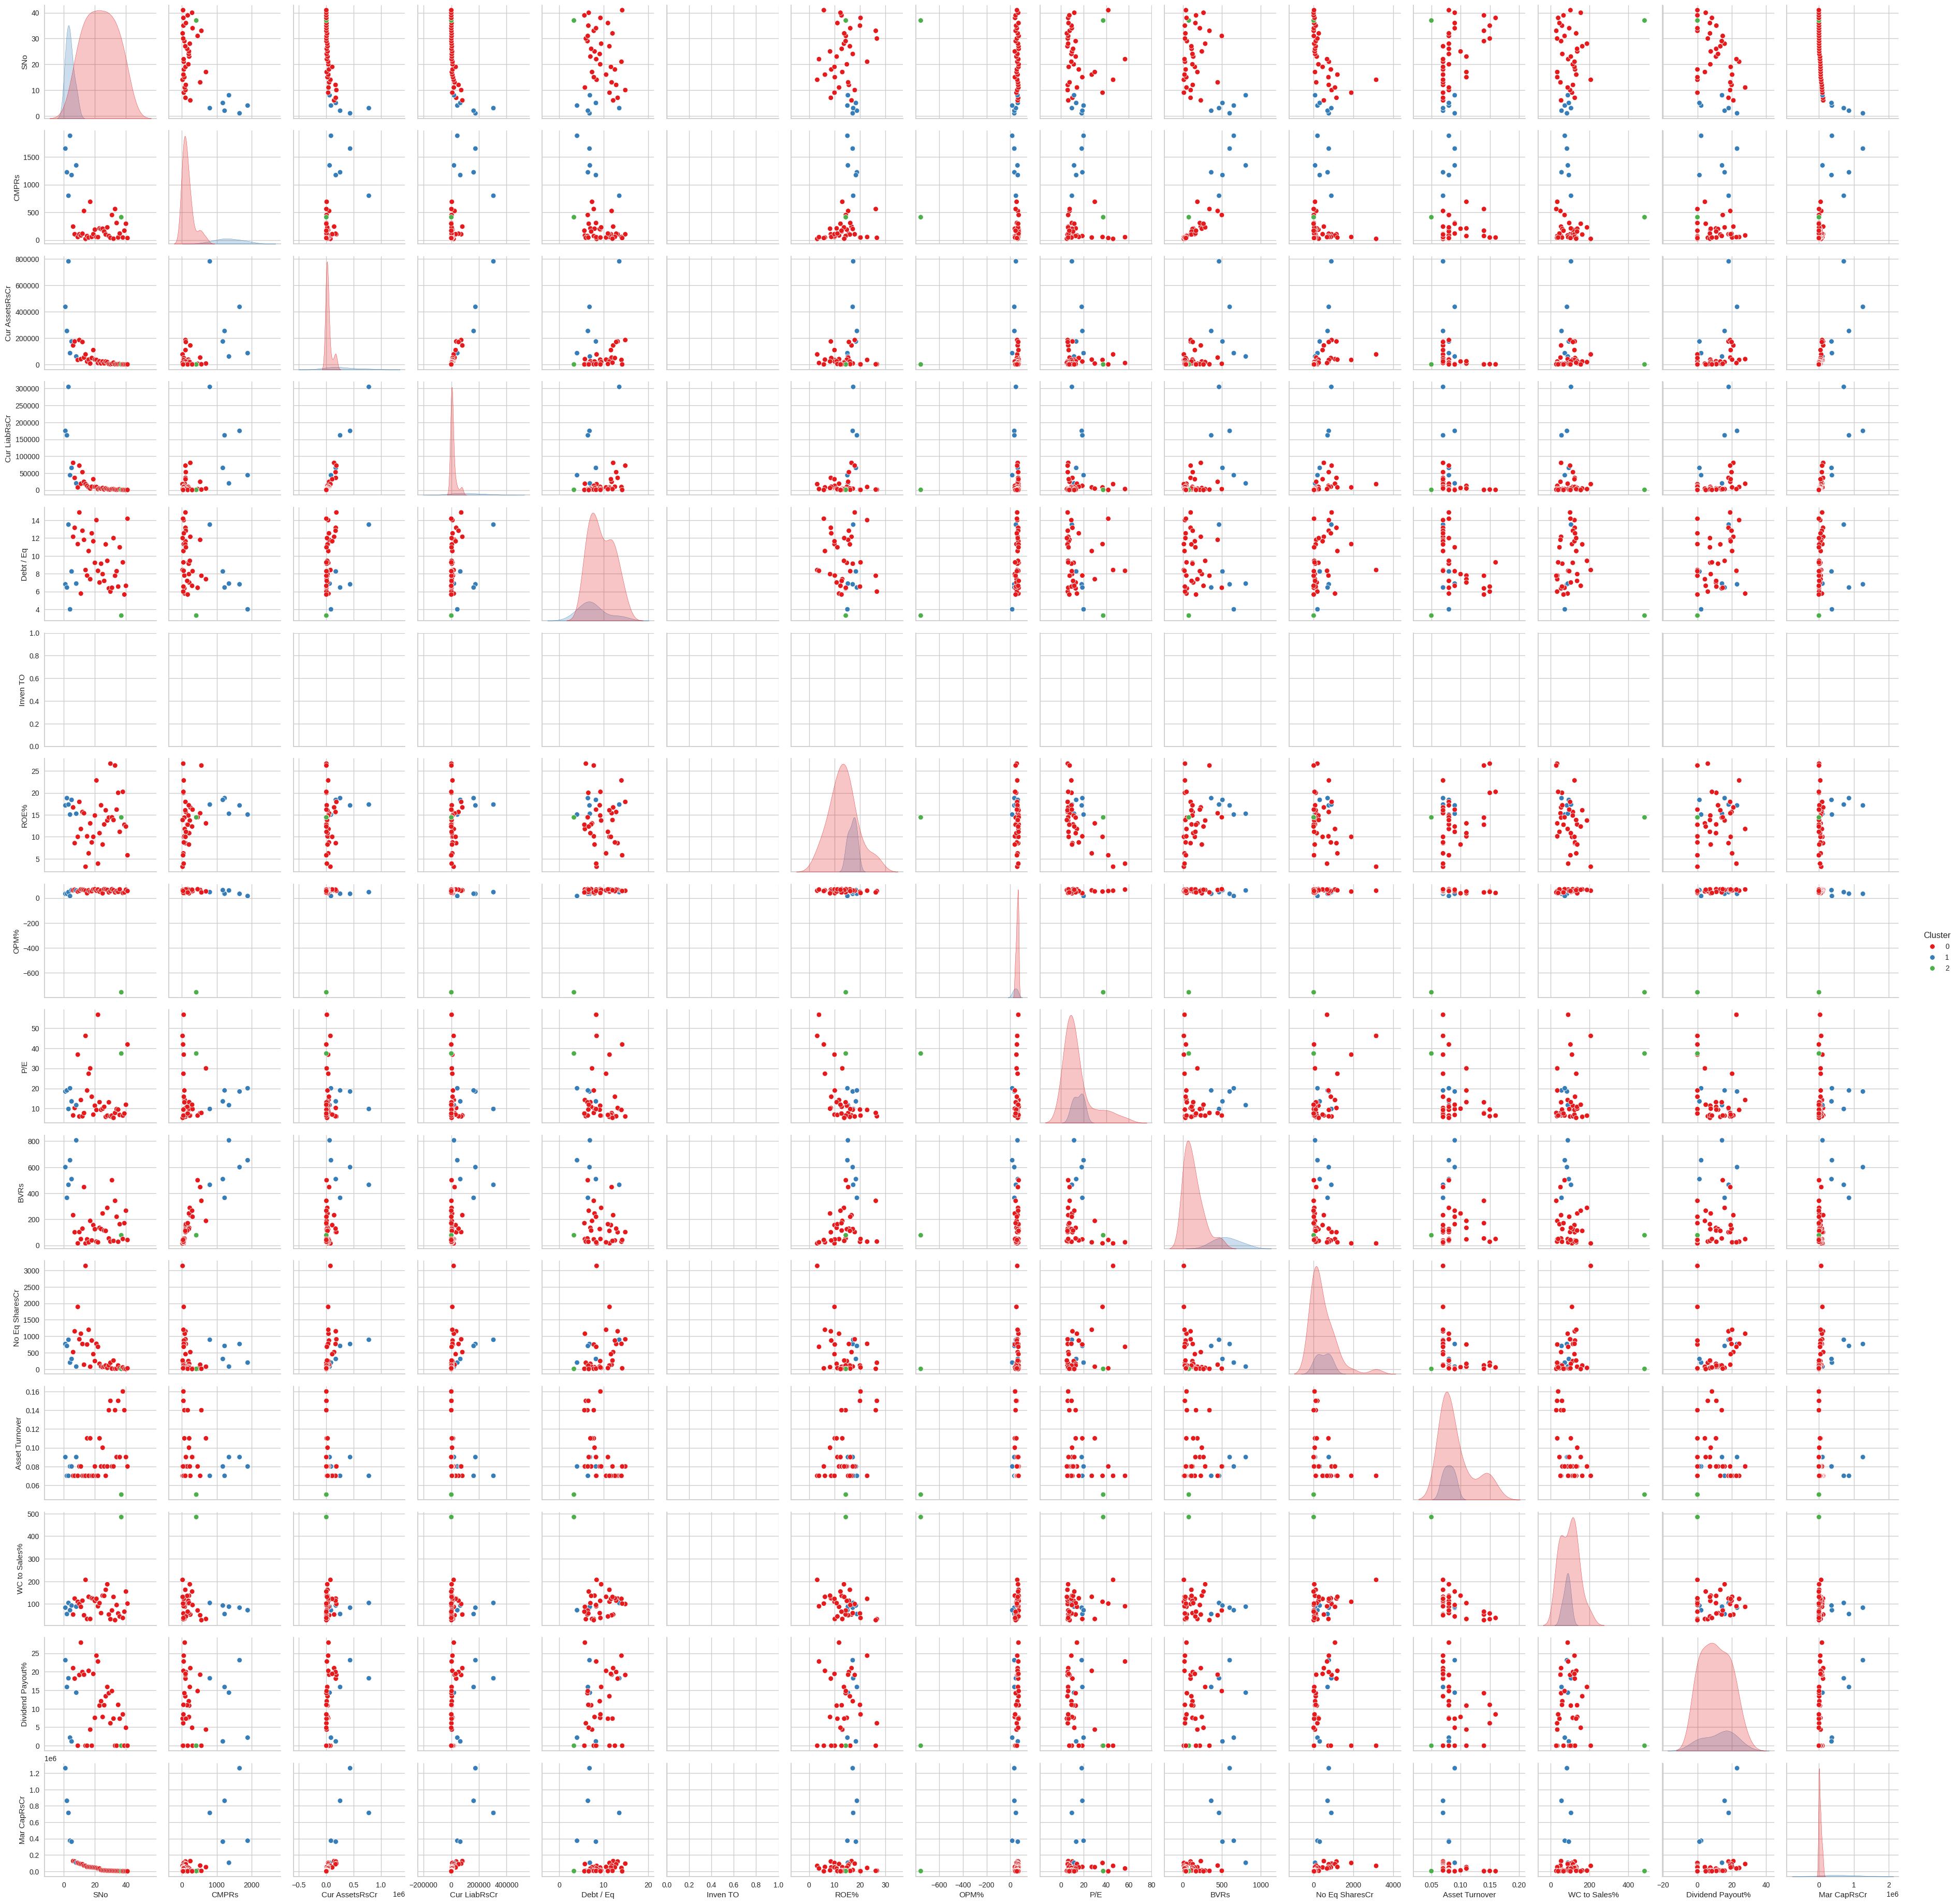

In [ ]:
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='Set1')
plt.show()

**Inference:**

*   List item
*   List item




### Appendix I: Tried different clustering mechanisms

In [ ]:
# List to store the clustering results
results = {}

# Combination 1: Ward Linkage with Euclidean metric
ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
results['Ward (Euclidean)'] = ward_clustering.fit_predict(data_scaled)

# Combination 2: Complete Linkage with Euclidean metric
complete_clustering_euclidean = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
results['Complete (Euclidean)'] = complete_clustering_euclidean.fit_predict(data_scaled)

# Combination 3: Complete Linkage with Manhattan metric
complete_clustering_manhattan = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='manhattan')
results['Complete (Manhattan)'] = complete_clustering_manhattan.fit_predict(data_scaled)

# Combination 4: Complete Linkage with Cosine metric
complete_clustering_cosine = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='cosine')
results['Complete (Cosine)'] = complete_clustering_cosine.fit_predict(data_scaled)

# Combination 5: Average Linkage with Euclidean metric
average_clustering_euclidean = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
results['Average (Euclidean)'] = average_clustering_euclidean.fit_predict(data_scaled)

# Combination 6: Average Linkage with Manhattan metric
average_clustering_manhattan = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='manhattan')
results['Average (Manhattan)'] = average_clustering_manhattan.fit_predict(data_scaled)

# Combination 7: Average Linkage with Cosine metric
average_clustering_cosine = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='cosine')
results['Average (Cosine)'] = average_clustering_cosine.fit_predict(data_scaled)

# Combination 8: Average Linkage with Jaccard metric
# Note: Jaccard is generally used for binary data
average_clustering_jaccard = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='precomputed')
# To use Jaccard, you would need to create a Jaccard distance matrix manually

# Combination 9: Single Linkage with Euclidean metric
single_clustering_euclidean = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='euclidean')
results['Single (Euclidean)'] = single_clustering_euclidean.fit_predict(data_scaled)

# Combination 10: Single Linkage with Manhattan metric
single_clustering_manhattan = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='manhattan')
results['Single (Manhattan)'] = single_clustering_manhattan.fit_predict(data_scaled)

# Combination 11: Single Linkage with Cosine metric
single_clustering_cosine = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='cosine')
results['Single (Cosine)'] = single_clustering_cosine.fit_predict(data_scaled)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


   Ward (Euclidean)  Complete (Euclidean)  Complete (Manhattan)  \
0                 1                     1                     1   
1                 2                     2                     2   
2                 0                     0                     0   

   Complete (Cosine)  Average (Euclidean)  Average (Manhattan)  \
0                  1                    1                    1   
1                  2                    2                    2   
2                  0                    0                    0   

   Average (Cosine)  Single (Euclidean)  Single (Manhattan)  Single (Cosine)  
0                 1                   1                   1                1  
1                 0                   2                   2                2  
2                 0                   0                   0                0  


C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 